In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle as p
import glob
import os

In [17]:
List = glob.glob(os.path.join('./data/', '*.p'))

In [18]:
print List

['./data/R8_8pc_metal.0693.scal0.p', './data/R8_8pc_metal.0683.scal0.p', './data/R8_8pc_metal.0434.scal0.p', './data/R8_8pc_metal.0424.scal0.p', './data/R8_8pc_metal.0261.scal0.p', './data/R8_8pc_metal.0319.scal0.p', './data/R8_8pc_metal.0271.scal0.p', './data/R8_8pc_metal.0309.scal0.p', './data/R8_8pc_metal.0107.scal0.p', './data/R8_8pc_metal.0117.scal0.p', './data/R8_8pc_metal.0648.scal0.p', './data/R8_8pc_metal.0658.scal0.p', './data/R8_8pc_metal.0165.scal0.p', './data/R8_8pc_metal.0175.scal0.p', './data/R8_8pc_metal.0203.scal0.p', './data/R8_8pc_metal.0213.scal0.p', './data/R8_8pc_metal.0456.scal0.p', './data/R8_8pc_metal.0446.scal0.p', './data/R8_8pc_metal.0597.scal0.p', './data/R8_8pc_metal.0587.scal0.p', './data/R8_8pc_metal.0138.scal0.p', './data/R8_8pc_metal.0040.scal0.p', './data/R8_8pc_metal.0128.scal0.p', './data/R8_8pc_metal.0050.scal0.p', './data/R8_8pc_metal.0615.scal0.p', './data/R8_8pc_metal.0605.scal0.p', './data/R8_8pc_metal.0573.scal0.p', './data/R8_8pc_metal.0563.s

In [19]:
def TwoPointFuct(Data,rArray,NumAngle,dx,dy):
    TwoPoint = [] ### Creates the empty Two-Point correlation array
    Zmean=Data.mean() ### Calculates the mean of the data
    Zvar=Data.var() ### Calculates the variance of the data
    angleMax = 2 * np.pi  ### Sets the max angle at 2 pi, or one full rotation
    dangle = angleMax/NumAngle ### Creates 
    angleindex = np.arange(NumAngle)
    angle = angleindex * dangle
    Nx,Ny = Data.shape
    i_index = np.arange(Nx)
    j_index = np.arange(Ny)
    Nr, = rArray.shape
    for rad in rArray:
        for ang in angle:
            dxi = (rad * np.cos(ang))
            dyj = (rad * np.sin(ang))
            di = dxi / dx
            dj = dyj / dy
            sum = 0
            for i in i_index:
                for j in j_index:
                    i2=(i+int(round(di)))%Nx
                    j2=(j+int(round(dj)))%Ny
                    sum += Data[i,j] * Data[i2,j2]
            TwoPoint.append(sum/(Nx * Ny))
    tp_2d=(np.array(TwoPoint).reshape(Nr,NumAngle)-Zmean**2)/Zvar
    return tp_2d

In [20]:
for i in List[:10]:
    if os.path.isfile(i+'.txt'):
        print i

./data/R8_8pc_metal.0693.scal0.p
./data/R8_8pc_metal.0683.scal0.p
./data/R8_8pc_metal.0434.scal0.p
./data/R8_8pc_metal.0424.scal0.p
./data/R8_8pc_metal.0261.scal0.p
./data/R8_8pc_metal.0319.scal0.p
./data/R8_8pc_metal.0271.scal0.p
./data/R8_8pc_metal.0309.scal0.p
./data/R8_8pc_metal.0107.scal0.p
./data/R8_8pc_metal.0117.scal0.p


In [22]:
for i in List:
    if not os.path.isfile(i+'.txt'):       
        Z = p.load(open(i))

        Zxy_data = Z['z']["data"]
        Zxy_bounds = Z['z']["bounds"]
        Nx,Ny = Zxy_data.shape

        Lx = Zxy_bounds[1] - Zxy_bounds[0]
        Ly = Zxy_bounds[3] - Zxy_bounds[2]

        Xmin = Zxy_bounds[0]
        Ymin = Zxy_bounds[2]

        i_index = np.arange(Nx)
        j_index = np.arange(Ny)

        dx = Lx/Nx
        dy = Ly/Ny

        Xi = i_index * dx + Xmin + dx/2
        Yj = j_index * dy + Ymin + dy/2

        Nr = 50
        rMax = Lx/2

        dr = rMax / Nr
        rindex = np.arange(Nr)
        r = rindex * dr 
        tp_2d = TwoPointFuct(Zxy_data,r,100,dx,dy)
        np.savetxt(i+".txt",tp_2d)

In [1]:
filename=List[0] 

NameError: name 'List' is not defined

In [12]:
Z = p.load(open(i))

Zxy_data = Z['z']["data"]
Zxy_bounds = Z['z']["bounds"]
Nx,Ny = Zxy_data.shape

tp_2d = np.loadtxt(filename+'.txt')

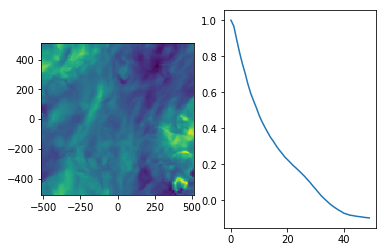

In [13]:
plt.subplot(121)
plt.imshow(Zxy_data,extent=Zxy_bounds)
plt.subplot(122)
plt.plot(tp_2d.mean(axis=1))


In [ ]:
filename

In [ ]:
import os
base=os.path.basename(filename)

In [ ]:
new_png_name='./png/'+base+'.png'
print new_png_name

In [ ]:
filename.replace('data/','png/')+'.png'